## **1. Introduction, descriptive statistics, Python and data visualization**

In [103]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.stats.proportion as smprop

### **Exercise 1.1 Infant birth weight**

#### a) What is the sample mean, variance and standard deviation of the female births? 

In [104]:
## In Python we compute it by:
female = np.array([2474, 2547, 2830, 3219, 3429, 3448, 3677, 3872, 4001,4116])

In [105]:
print("Mean: ", np.mean(female))

Mean:  3361.3


On average the infant birth weight for females is 3361.3 grams.

In [106]:
print("Variance: ", np.var(female, ddof=1))

print("Standard deviation: ", np.std(female, ddof=1))

Variance:  344920.4555555556
Standard deviation:  587.2992895922449


We can interpret this as: 
the weight of the female infants are on average around 587 grams away from the mean weight of 3361.3 grams

#### **Why DDOF=1?**

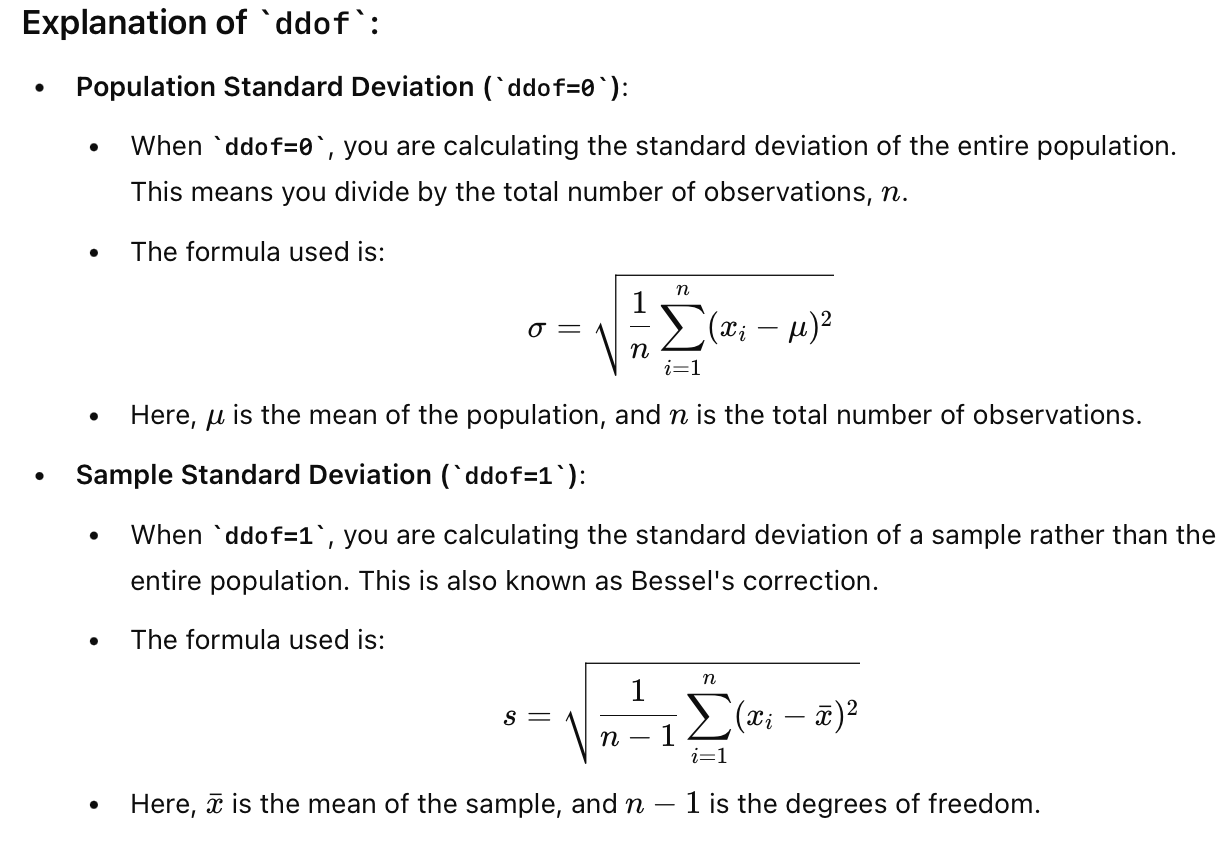

#### b) Compute the same summary statistics of the male births. Compare and explain differences with the results for the female births.

In [107]:
male = np.array([2844, 2863, 2963, 3239, 3379, 3449, 3582, 3926, 4151,4356])

print("Mean:", np.mean(male))

print("Variance: ", np.var(male, ddof=1))

print("Standard deviation: ", np.std(male, ddof=1))

Mean: 3475.2
Variance:  283158.1777777777
Standard deviation:  532.1260919911537


We can interpret this as: 

On average the male infants  weigh more (3361.3 vs. 3475) but the variation is smaller.

The weight of the male infants are on average around 532 grams away from the mean weight of 3475 grams.

#### c and d) Boxplots

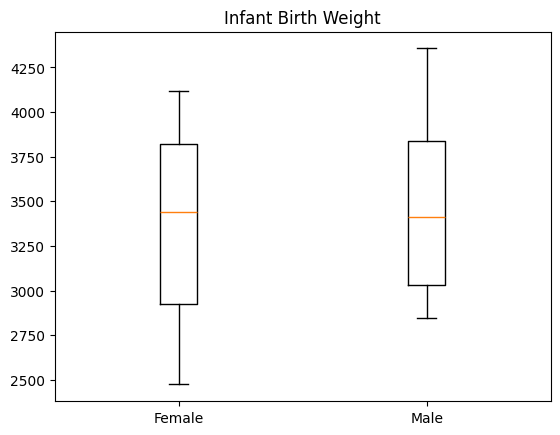

In [108]:
plt.boxplot([female, male], labels=['Female', 'Male'])
plt.title("Infant Birth Weight")
plt.show()

No exteme observations (modified boxplots are the default)

#### e) What are the coefficient of variations in the two groups?

In [109]:
def coefficient_of_variation(data):
    mean = np.mean(data)
    std_dev = np.std(data, ddof=1)
    cv = (std_dev / mean) * 100
    return cv

print("Female CoV:", coefficient_of_variation(female))

print("Male CoV:", coefficient_of_variation(male))

Female CoV: 17.472385374475497
Male CoV: 15.312099792563124


The coefficient of variation (CV) is the ratio of the standard deviation to the mean. The higher the coefficient of variation, the greater the level of dispersion around the mean

### **Exercise 1.2 Course Grades**

#### a) What is the median of the 251 achieved grades?


In [110]:
# Create the array of grades
grades = np.repeat([-3, 0, 2, 4, 7, 10, 12], repeats=[32, 33, 39, 42, 43, 28, 34])


print("Median of grades:", np.median(grades))


Median of grades: 4.0


In [123]:
grades

array([-3, -3, -3, -3, -3, -3, -3, -3, -3, -3, -3, -3, -3, -3, -3, -3, -3,
       -3, -3, -3, -3, -3, -3, -3, -3, -3, -3, -3, -3, -3, -3, -3,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,
        4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,
        4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  7,  7,  7,  7,  7,  7,  7,
        7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,
        7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,
        7,  7, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10,
       10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 12, 12, 12, 12,
       12, 12, 12, 12, 12

#50% af eleverne har en karakter på 4 eller under

#### b) What are the quartiles and the IQR (Inter Quartile Range)?

In [111]:
# Calculate the first quartile (Q1) and third quartile (Q3)
Q1 = np.percentile(grades, 25, method ="averaged_inverted_cdf")
Q3 = np.percentile(grades, 75, method ="averaged_inverted_cdf")

# Calculate the Interquartile Range (IQR)
IQR = Q3 - Q1

print("Interquartile Range (IQR) of grades:", IQR)

Interquartile Range (IQR) of grades: 7.0


Hence 50% of all grades (in the sample) lie within 7.

### **Exercise 1.3 Cholesterol**

#### a) What is the median of the cholesterol measurements for the patients before treatment, and similarly after treatment?

In [112]:
before = np.array([9.1, 8.0, 7.7, 10.0, 9.6, 7.9, 9.0, 7.1, 8.3, 9.6,
            8.2, 9.2, 7.3, 8.5, 9.5])
after = np.array([8.2, 6.4, 6.6, 8.5, 8.0, 5.8, 7.8, 7.2, 6.7, 9.8,
                  7.1, 7.7, 6.0, 6.6, 8.4])

In [113]:
print("Median of before:", np.median(before))

print("Median of after:", np.median(after))

Median of before: 8.5
Median of after: 7.2


#### b) Find the standard deviations of the cholesterol measurements of the patients before and after treatment.

In [114]:
print("Std of before:", np.std(before, ddof=1))

print("Std of after:", np.std(after, ddof=1))

Std of before: 0.9023778112773574
Std of after: 1.0901288696209053


The spread after is larger than before

#### c) Find the sample covariance between cholesterol measurements of the pa- tients before and after treatment.

In [115]:
cov = np.cov(before, after, ddof=1)[0, 1]

print("Covariance:", cov)

Covariance: 0.7964285714285714


#### d) Find the sample correlation between cholesterol measurements of the pa- tients before and after treatment.

In [116]:
cor = np.corrcoef(before, after)[0,1]

print("Correlation:", cor)

Correlation: 0.809618797174745


e) Compute the 15 differences (Dif = Before − After) and do various summary statistics and plotting of these: sample mean, sample variance, sample standard deviation, boxplot etc.

In [117]:
difference = after - before

print("Mean of difference:", np.mean(difference))
print("Var of difference:", np.var(difference, ddof=1))
print("Std of difference:", np.std(difference, ddof=1))


Mean of difference: -1.2133333333333336
Var of difference: 0.4098095238095241
Std of difference: 0.6401636695482836


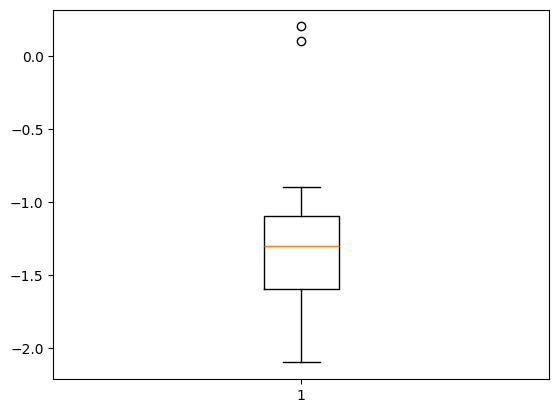

In [118]:
plt.boxplot(difference)
plt.show()

The mean effect (decrease of cholesterol due to treatment) would be estimated at 1.2 nMol/l.

But clearly there is also a high degree of differences in what the effect is: the standard deviation of (all) the differences is 0.64.

Outliers:
Looking at the boxplot, we find two patients with values identified as extreme, which from the data table is seen to be patient no 8 and 10.

#### f) Observing such data the big question is whether an average decrease in cholesterol level can be “shown statistically”. How to formally answer this question is presented in Chapter 3, but consider now which summary statistics and/or plots would you look at to have some idea of what the answer will be?

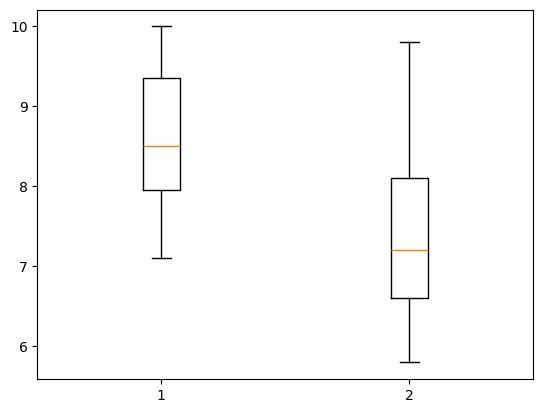

In [119]:
fig = plt.boxplot([before,after])
plt.show()

And we would conclude: the average effect is 1.2 (we see no extreme patients in this plot!), and the standard deviation within each group of data is around 1 (see above: sbefore = 0.9 and safter = 1.1).

Which of the two approaches do you prefer - the “difference”-approach or the “separate”-approach?

We would definitely recommend the “difference”-approach, or as we will call it later, the “paired” approach, since this match the setup of the study, and in the most cor- rect way uses the relevant information. Note how the difference-approach identifies the outliers/extremes and also ends up with much smaller standard deviations, also seen by the range and/or box-widths(IQR) in the box-plots. The point is that in the differences we have removed the variability stemming from the characteristics of each patient (e.g. body mass, genes, etc.). One phrase used is that in such an exper- iment like this, a patient acts as his own control, and hence the fact the patients are different does not blur the important effect signal.

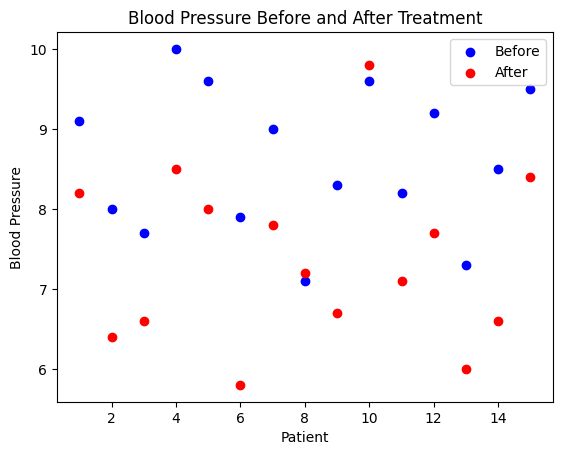

In [121]:
#create a scatterplot of before and after with patiens numbers 1-15
patients  = np.arange(1, 16)

plt.scatter(patients, before, color='blue', label='Before')
plt.scatter(patients, after, color='red', label='After')
plt.legend()
plt.xlabel('Patient')
plt.ylabel('Blood Pressure')
plt.title('Blood Pressure Before and After Treatment')
plt.show()